In [1]:
import pandas as pd
import numpy as np
from nba_api.stats.endpoints import shotchartdetail, shotchartleaguewide, playercareerstats
from nba_api.stats.library.data import players

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
players_df = pd.DataFrame(data = players,
                         columns = ['id', 
                                    'first_name', 
                                    'last_name',
                                    'full_name',
                                    'is_active'])

In [3]:
players_df.query('full_name == "LeBron James"')

,id,first_name,last_name,full_name,is_active
2033,2544,James,LeBron,LeBron James,True


In [4]:
players_df.query('full_name == "Stephen Curry"')

,id,first_name,last_name,full_name,is_active
910,201939,Curry,Stephen,Stephen Curry,True


In [5]:
lbj = playercareerstats.PlayerCareerStats(player_id=2544).get_data_frames()

In [6]:
lbj[0]['TEAM_ID'].unique()

array([1610612739, 1610612748, 1610612747])

In [7]:
lbj_shot_chart = shotchartdetail.ShotChartDetail(player_id=2544,
                                                team_id=1610612739,
                                                context_measure_simple='FGA').get_data_frames()

In [8]:
lbj_shot_chart[0].columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM'],
      dtype='object')

In [9]:
lbj_shot_chart[0]['EVENT_TYPE'].value_counts()

Missed Shot    8651
Made Shot      8369
Name: EVENT_TYPE, dtype: int64

In [10]:
lbj_shots = lbj_shot_chart[0]
lg_avg_shot = lbj_shot_chart[1]

In [11]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [12]:
lbj_shots['EVENT_TYPE'].value_counts()

Missed Shot    8651
Made Shot      8369
Name: EVENT_TYPE, dtype: int64

In [13]:
made_shots = lbj_shots.query('EVENT_TYPE == "Made Shot"')
missed_shots = lbj_shots.query('EVENT_TYPE == "Missed Shot"')

In [16]:
lbj_shots[['SHOT_TYPE', 'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE']]



,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE
0,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,15
1,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,13
2,2PT Field Goal,Mid-Range,Right Side(R),16-24 ft.,16
3,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,14
4,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,5
...,...,...,...,...,...
17015,2PT Field Goal,Mid-Range,Right Side(R),16-24 ft.,17
17016,2PT Field Goal,Mid-Range,Center(C),16-24 ft.,20
17017,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1
17018,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1


In [17]:
lbj_shots.SHOT_ZONE_BASIC.value_counts()

Restricted Area          6494
Mid-Range                5105
Above the Break 3        3156
In The Paint (Non-RA)    1711
Left Corner 3             264
Right Corner 3            263
Backcourt                  27
Name: SHOT_ZONE_BASIC, dtype: int64

In [18]:
lbj_shots.SHOT_ZONE_AREA.value_counts()

Center(C)                9236
Left Side Center(LC)     2223
Left Side(L)             2048
Right Side Center(RC)    1752
Right Side(R)            1722
Back Court(BC)             39
Name: SHOT_ZONE_AREA, dtype: int64

In [32]:
shot_types = lbj_shots.groupby(['SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA']).count().index

In [35]:
for i, j in shot_types:
    print(i+'|'+j)

Above the Break 3|Back Court(BC)
Above the Break 3|Center(C)
Above the Break 3|Left Side Center(LC)
Above the Break 3|Right Side Center(RC)
Backcourt|Back Court(BC)
In The Paint (Non-RA)|Center(C)
In The Paint (Non-RA)|Left Side(L)
In The Paint (Non-RA)|Right Side(R)
Left Corner 3|Left Side(L)
Mid-Range|Center(C)
Mid-Range|Left Side Center(LC)
Mid-Range|Left Side(L)
Mid-Range|Right Side Center(RC)
Mid-Range|Right Side(R)
Restricted Area|Center(C)
Right Corner 3|Right Side(R)


In [40]:
def plot_area(data):
    plt.figure(figsize=(12,11))
    draw_court(outer_lines=True)
    plt.scatter(data.LOC_X, data.LOC_Y, marker = 'X', c='red')
    # plt.scatter(missed_shots.LOC_X, missed_shots.LOC_Y, marker = 'o', c='green')
    plt.xlim(-300,300)
    plt.ylim(-100,500)
    plt.title(f'Zone: {data.SHOT_ZONE_BASIC.unique()[0]}\n Area: {data.SHOT_ZONE_AREA.unique()[0]}')
    plt.show()

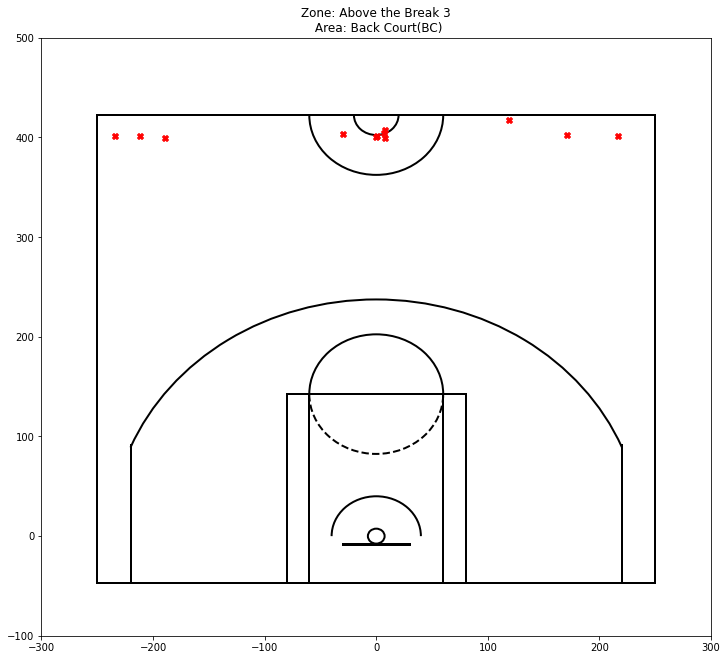

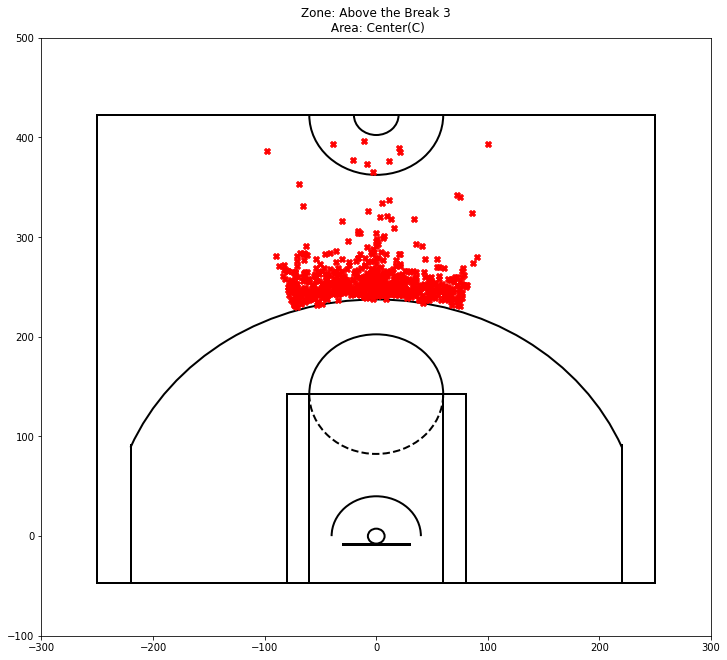

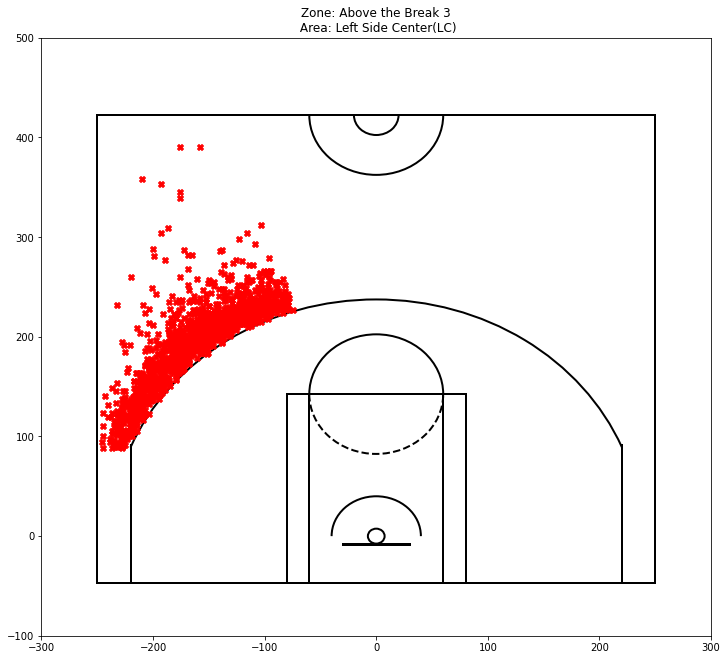

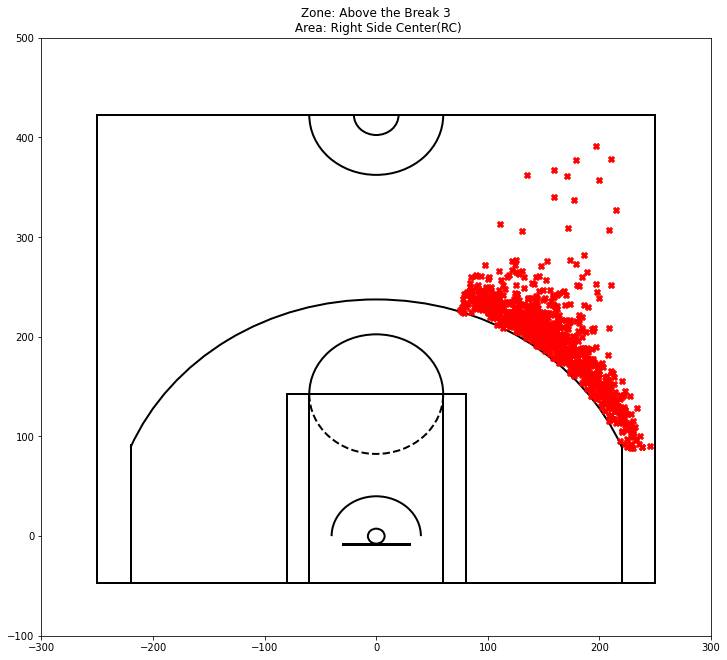

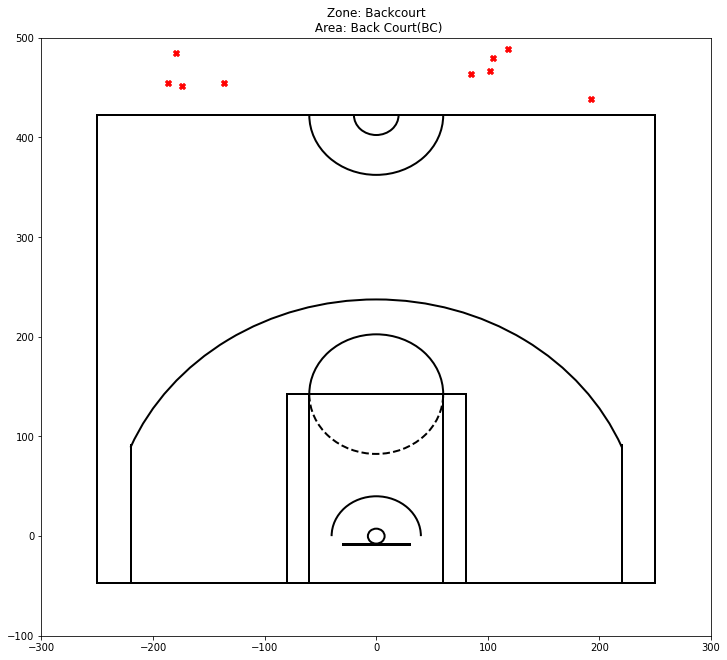

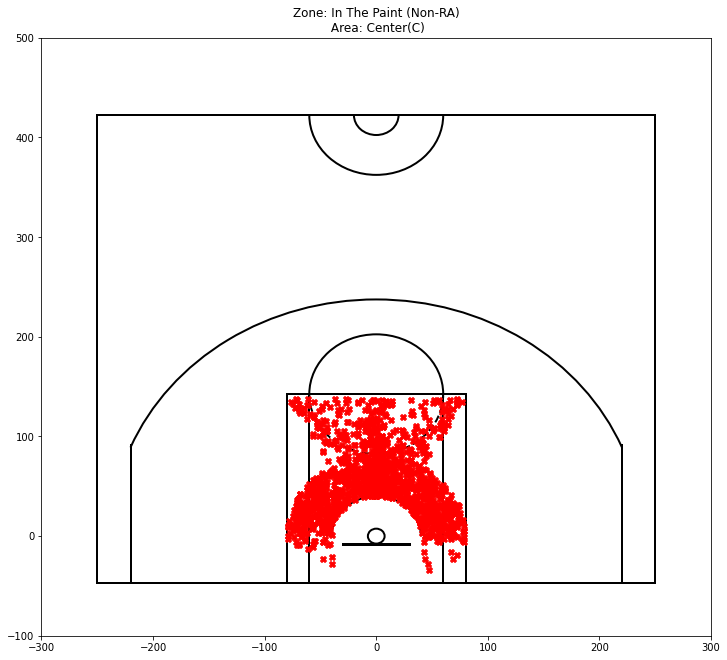

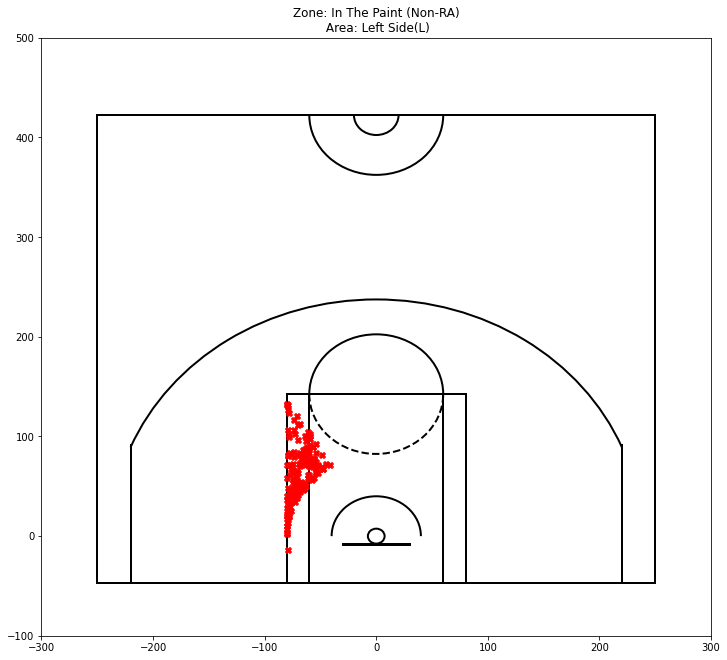

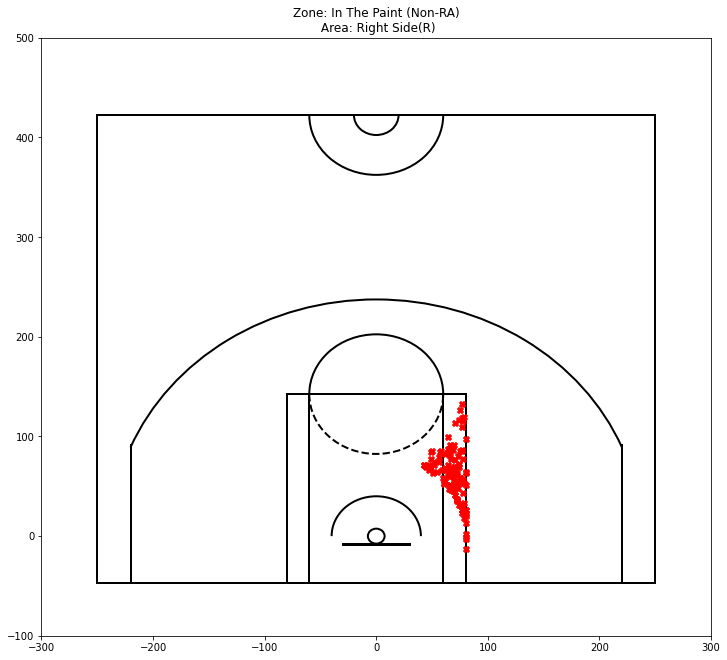

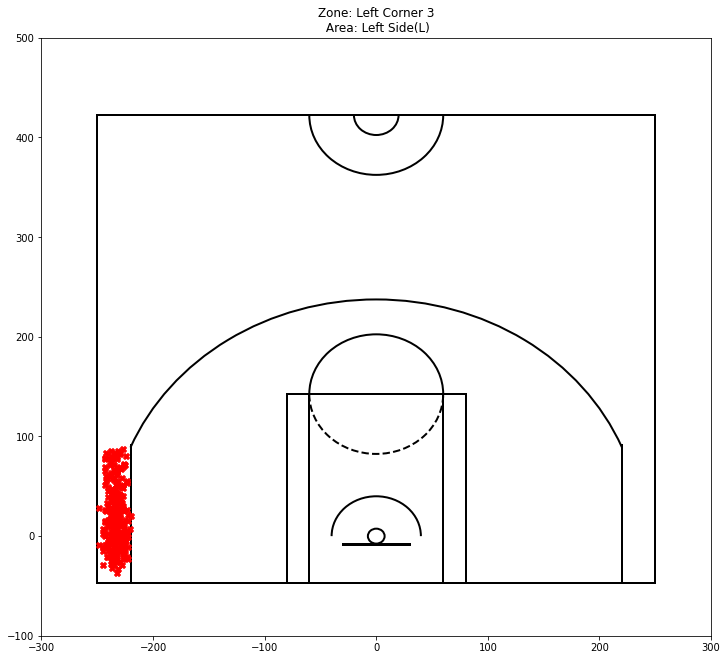

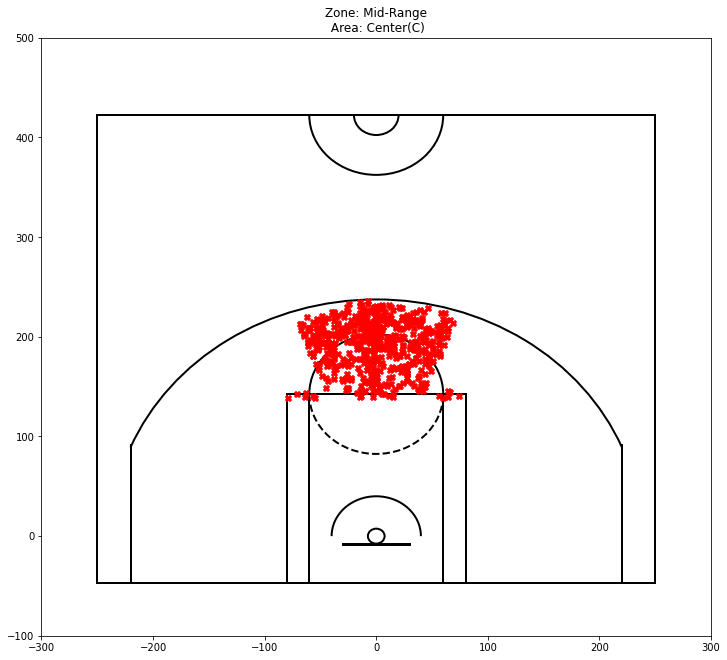

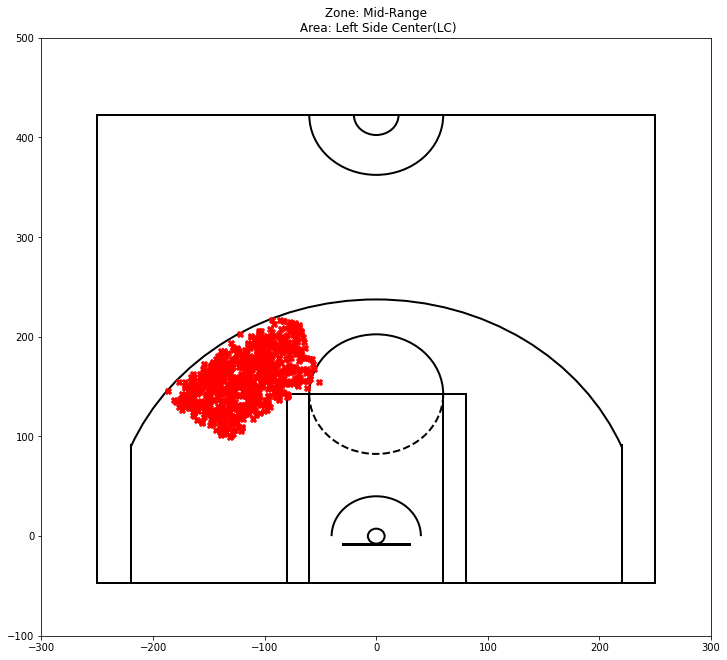

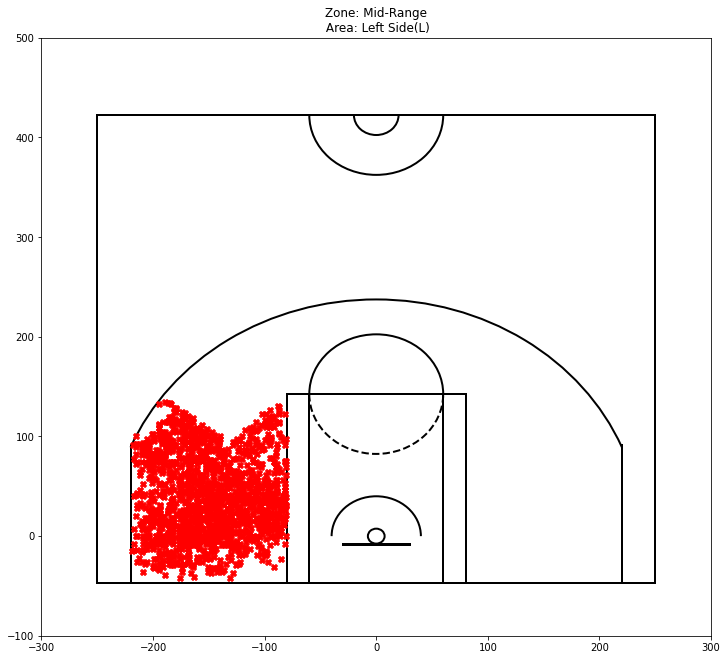

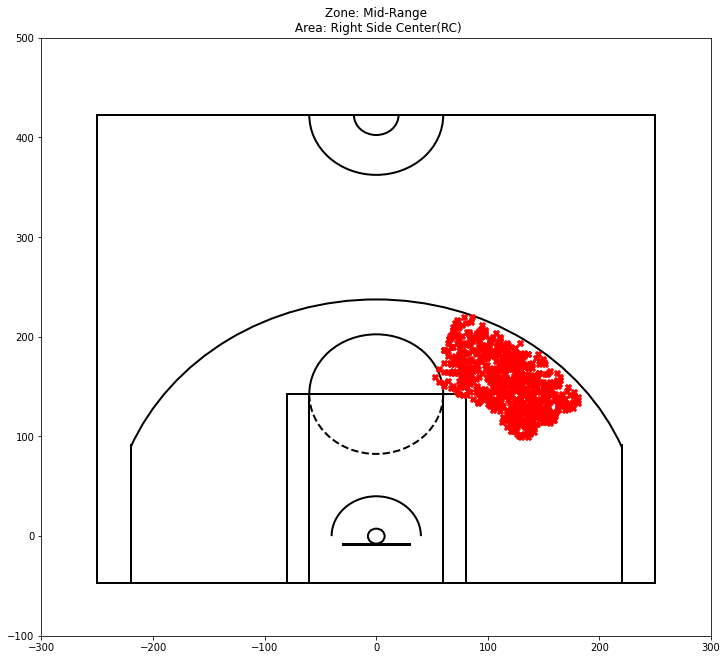

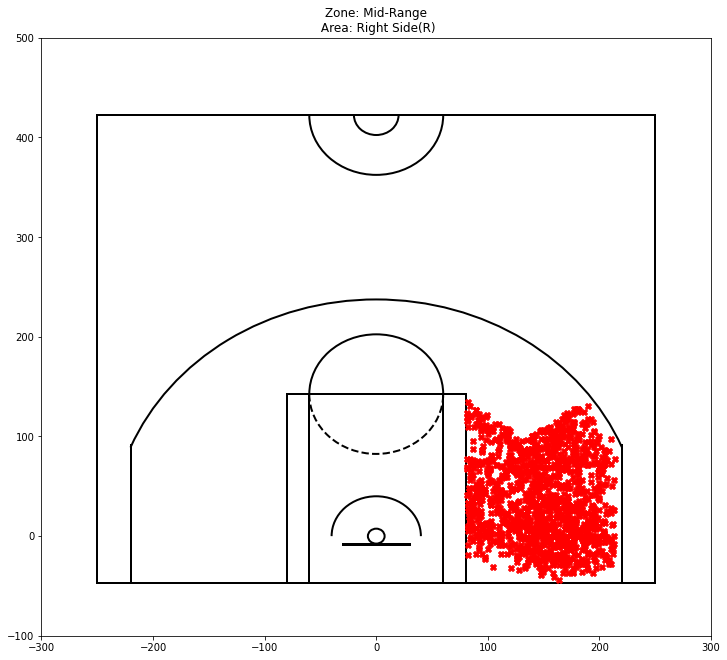

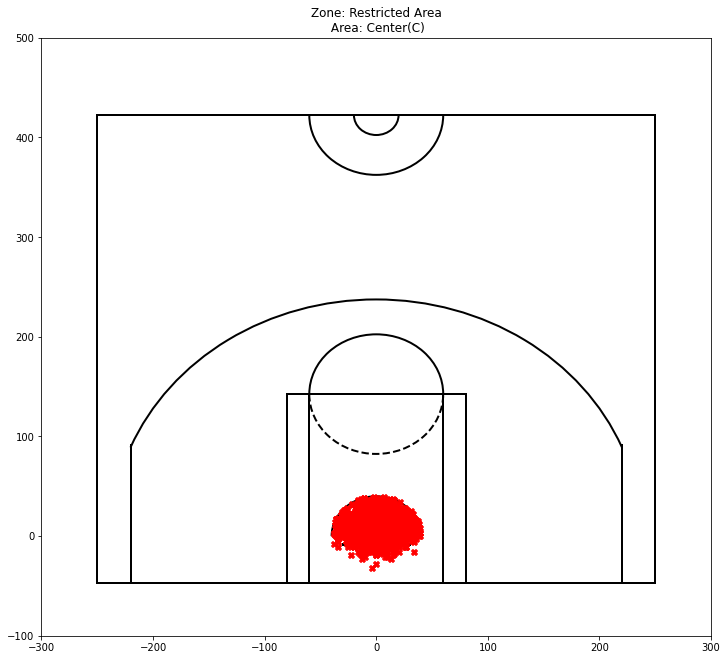

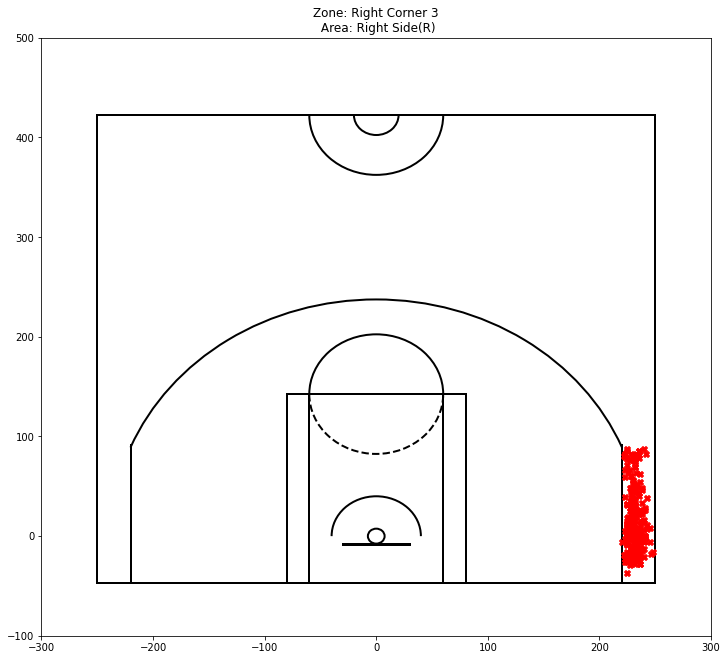

In [41]:
for zone, area in shot_types:
    plot_area(lbj_shots.query(f"(SHOT_ZONE_BASIC == '{zone}')&(SHOT_ZONE_AREA == '{area}')"))
    

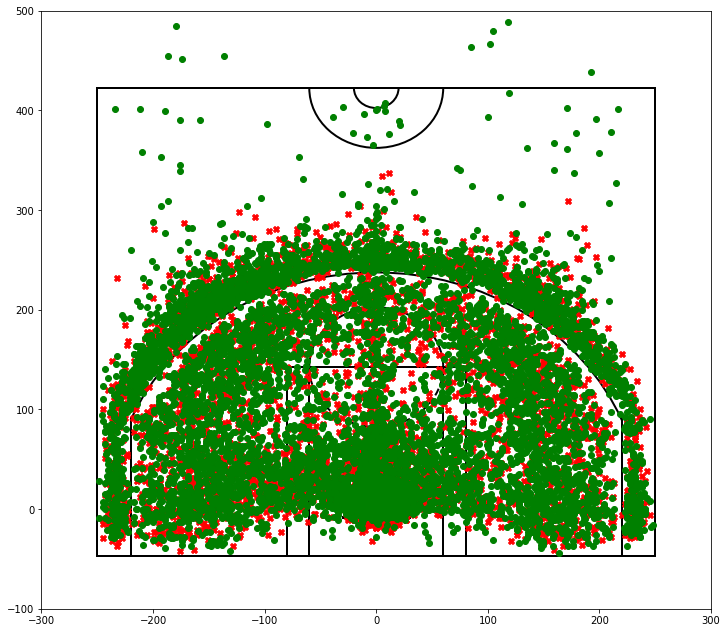

In [14]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.scatter(made_shots.LOC_X, made_shots.LOC_Y, marker = 'X', c='red')
plt.scatter(missed_shots.LOC_X, missed_shots.LOC_Y, marker = 'o', c='green')
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()